In [1]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision import transforms

import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def find_data_dir():
    data_path = 'data'
    while os.path.exists(data_path) != True:
        data_path = '../' + data_path
        
    return data_path

In [3]:
# MNIST dataset

transform = transforms.Compose([
        transforms.Resize(32),
        transforms.ToTensor(),
])

mnist_train = datasets.MNIST(root=find_data_dir(),
                          train=True,
                          transform=transform,
                          download=True)
print("Downloading Train Data Done ! ")

mnist_test = datasets.MNIST(root=find_data_dir(),
                         train=False,
                         transform=transform,
                         download=True)
print("Downloading Test Data Done ! ")

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# our model
class Generator(nn.Module):
    def __init__(self, n_z=100, d=128):
        super(Generator, self).__init__() 
        self.deconv1 = nn.ConvTranspose2d(n_z, d*8, 4, 1, 0),
        self.bnorm1 = nn.BatchNorm2d(d*8),
        
        self.devonc2 = nn.ConvTranspose2d(d*8, d*4, 4, 2, 1),
        self.bnorm2 = nn.BatchNorm2d(d*4),
        
        self.deconv3 = nn.ConvTranspose2d(d*4, d*2, 4, 2, 1),
        self.bnorm3 = nn.BatchNorm2d(d*2),
        
        self.deconv4 = nn.ConvTranspose2d(d*2, 1, 4, 2, 1),
        
                    
    def forward(self, X):
        X = F.leaky_relu(self.bnorm1(self.deconv1(X)), negative_slope=0.003)
        X = F.leaky_relu(self.bnorm2(self.deconv2(X)), negative_slope=0.003)
        X = F.leaky_relu(self.bnorm3(self.deconv3(X)), negative_slope=0.003)
        X = torch.sigmoid(self.deconv4(X), negative_slope=0.003)
        return X
    
class Discriminator(nn.Module):
    def __init__(self, d=128):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(1, d, 4, 2, 1),
        self.bnorm1 = nn.BatchNorm2d(d),
        
        self.conv2 = nn.Conv2d(d, d*2, 4, 2, 1),
        self.bnorm2 = nn.BatchNorm2d(d*2),
        
        self.conv3 = nn.Conv2d(d*2, d*4, 4, 2, 1),
        self.bnorm3 = nn.BatchNorm2d(d*4),
        
        self.conv4 = nn.Conv2d(d*4, 1, 4, 1, 0),
        
    def forward(self, X):
        X = F.leaky_relu(self.bnorm1(self.conv1(X)), negative_slope=0.003)
        X = F.leaky_relu(self.bnorm2(self.conv2(X)), negative_slope=0.003)
        X = F.leaky_relu(self.bnorm3(self.conv3(X)), negative_slope=0.003)
        X = torch.sigmoid(self.conv1(X))
        return X

In [4]:
G = Generator().to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

batch_size = 100

data_iter = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=1)

In [5]:
def plot_generator(num = 10):
    z = torch.randn(num, 100, 1, 1).to(device)
    
    test_g = G.forward(z)
    plt.figure(figsize=(8, 2))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(test_g[i].view(32, 32).data.cpu().numpy(), cmap=plt.cm.gray)
        plt.axis('off')
    plt.show()
    

Iteration maker Done !
Epoch :  1 Iteration :  100 G_loss :  7.6094556 D_loss :  0.0017501046
Epoch :  1 Iteration :  200 G_loss :  7.854101 D_loss :  0.0042999196
Epoch :  1 Iteration :  300 G_loss :  8.008581 D_loss :  0.0029768413
Epoch :  1 Iteration :  400 G_loss :  8.807497 D_loss :  0.0016210664
Epoch :  1 Iteration :  500 G_loss :  8.619266 D_loss :  0.01429943
Epoch :  1 Iteration :  600 G_loss :  7.147954 D_loss :  0.009483489


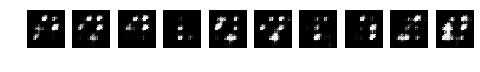

Epoch :  2 Iteration :  100 G_loss :  7.619742 D_loss :  0.0033425507
Epoch :  2 Iteration :  200 G_loss :  7.591393 D_loss :  0.11140231
Epoch :  2 Iteration :  300 G_loss :  7.175904 D_loss :  0.0029015657
Epoch :  2 Iteration :  400 G_loss :  5.498921 D_loss :  0.03438154
Epoch :  2 Iteration :  500 G_loss :  7.4272795 D_loss :  0.013409356
Epoch :  2 Iteration :  600 G_loss :  5.002966 D_loss :  0.025105337


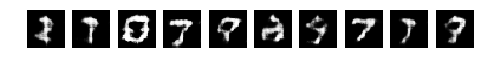

Epoch :  3 Iteration :  100 G_loss :  4.9793196 D_loss :  0.0850201
Epoch :  3 Iteration :  200 G_loss :  4.0700297 D_loss :  0.06895214
Epoch :  3 Iteration :  300 G_loss :  5.6274705 D_loss :  0.03535045
Epoch :  3 Iteration :  400 G_loss :  5.77342 D_loss :  0.047421336
Epoch :  3 Iteration :  500 G_loss :  5.0354424 D_loss :  0.09797577
Epoch :  3 Iteration :  600 G_loss :  6.0216455 D_loss :  0.1980458


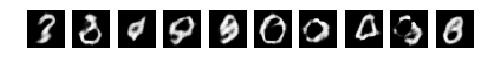

Epoch :  4 Iteration :  100 G_loss :  8.418706 D_loss :  0.32758838
Epoch :  4 Iteration :  200 G_loss :  5.894795 D_loss :  0.10230467
Epoch :  4 Iteration :  300 G_loss :  4.5501194 D_loss :  0.14357866
Epoch :  4 Iteration :  400 G_loss :  5.1920037 D_loss :  0.21374714
Epoch :  4 Iteration :  500 G_loss :  4.394273 D_loss :  0.06455372
Epoch :  4 Iteration :  600 G_loss :  3.5168116 D_loss :  0.021031942


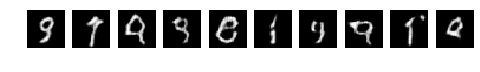

Epoch :  5 Iteration :  100 G_loss :  6.3893023 D_loss :  0.3669053
Epoch :  5 Iteration :  200 G_loss :  4.6383486 D_loss :  0.15713762
Epoch :  5 Iteration :  300 G_loss :  3.6732671 D_loss :  0.045628954
Epoch :  5 Iteration :  400 G_loss :  2.6475637 D_loss :  0.7521023
Epoch :  5 Iteration :  500 G_loss :  3.6083176 D_loss :  0.26484656
Epoch :  5 Iteration :  600 G_loss :  5.408523 D_loss :  0.119452894


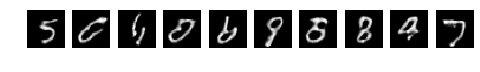

Epoch :  6 Iteration :  100 G_loss :  2.7658024 D_loss :  0.24118191
Epoch :  6 Iteration :  200 G_loss :  6.1974983 D_loss :  0.06351667
Epoch :  6 Iteration :  300 G_loss :  4.691724 D_loss :  0.21519822
Epoch :  6 Iteration :  400 G_loss :  2.9779649 D_loss :  0.3537115
Epoch :  6 Iteration :  500 G_loss :  6.44133 D_loss :  0.24344087
Epoch :  6 Iteration :  600 G_loss :  4.597566 D_loss :  0.5473002


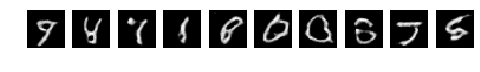

Epoch :  7 Iteration :  100 G_loss :  5.750985 D_loss :  0.062143642
Epoch :  7 Iteration :  200 G_loss :  3.481608 D_loss :  0.36483166
Epoch :  7 Iteration :  300 G_loss :  3.8328724 D_loss :  0.36383003
Epoch :  7 Iteration :  400 G_loss :  4.2068357 D_loss :  0.25676847
Epoch :  7 Iteration :  500 G_loss :  3.4723785 D_loss :  0.27913254
Epoch :  7 Iteration :  600 G_loss :  4.2555733 D_loss :  0.34270003


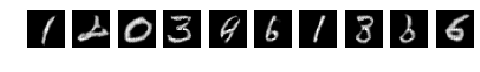

Epoch :  8 Iteration :  100 G_loss :  2.2838645 D_loss :  0.24484786
Epoch :  8 Iteration :  200 G_loss :  5.196181 D_loss :  0.17714208
Epoch :  8 Iteration :  300 G_loss :  5.067857 D_loss :  0.29705426
Epoch :  8 Iteration :  400 G_loss :  3.8526096 D_loss :  0.13032384
Epoch :  8 Iteration :  500 G_loss :  3.5123062 D_loss :  0.25212747
Epoch :  8 Iteration :  600 G_loss :  5.0122294 D_loss :  0.17579168


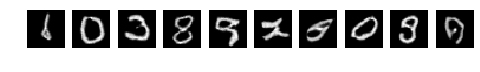

Epoch :  9 Iteration :  100 G_loss :  3.9462082 D_loss :  0.068693355
Epoch :  9 Iteration :  200 G_loss :  4.242293 D_loss :  0.11923505
Epoch :  9 Iteration :  300 G_loss :  3.3535755 D_loss :  0.2146661
Epoch :  9 Iteration :  400 G_loss :  4.735823 D_loss :  0.14943877
Epoch :  9 Iteration :  500 G_loss :  5.942786 D_loss :  0.38122264
Epoch :  9 Iteration :  600 G_loss :  3.8228521 D_loss :  0.21332033


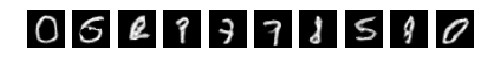

Epoch :  10 Iteration :  100 G_loss :  6.1992106 D_loss :  0.9639581
Epoch :  10 Iteration :  200 G_loss :  4.479364 D_loss :  1.1129646
Epoch :  10 Iteration :  300 G_loss :  2.4949753 D_loss :  0.39802167
Epoch :  10 Iteration :  400 G_loss :  3.0352902 D_loss :  0.21275994
Epoch :  10 Iteration :  500 G_loss :  2.6199145 D_loss :  0.16367453
Epoch :  10 Iteration :  600 G_loss :  1.9365326 D_loss :  0.18906736


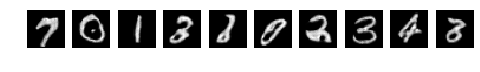

In [6]:
print("Iteration maker Done !")
history = {}
history['g_loss']=[]
history['d_loss']=[]
# Training loop
for epoch in range(10):
    avg_loss = 0
    total_batch = len(mnist_train) // batch_size
    
    for i, (batch_img, _) in enumerate(data_iter):
        
        # Preparing train data
        X = batch_img.to(device)
        
        real_lab = torch.ones(batch_size, 1).to(device)
        
        fake_lab = torch.zeros(batch_size, 1).to(device)
        
        
        # Training Discriminator
        D_pred = D.forward(X)
        d_loss_real = criterion(D_pred.view(-1, 1), real_lab)
        real_score = D_pred
        
        z = torch.randn(batch_size, 100, 1, 1).to(device)
        
        fake_images = G.forward(z)
        G_pred = D.forward(fake_images)
        d_loss_fake = criterion(G_pred.view(-1, 1), fake_lab)
        fake_score = G_pred
        
        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()
        
        
        # Training Generator
        z = torch.randn(batch_size, 100, 1, 1).to(device)
        fake_images = G.forward(z)
        G_pred = D.forward(fake_images)
        
        g_loss = criterion(G_pred.view(-1, 1), real_lab)
        
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()
        
        history['g_loss'].append(g_loss.data.cpu().numpy())
        history['d_loss'].append(d_loss.data.cpu().numpy())
        
        if (i+1)%100 == 0 :
            print("Epoch : ", epoch+1, "Iteration : ", i+1, "G_loss : ", g_loss.data.cpu().numpy(), "D_loss : ", d_loss.data.cpu().numpy())
    plot_generator()
    
torch.save(G.state_dict(), './trained/DCGAN/sd_gen')
torch.save(D.state_dict(), './trained/DCGAN/sd_dis')

torch.save(G, './trained/DCGAN/gen.pt')
torch.save(D, './trained/DCGAN/dis.pt')

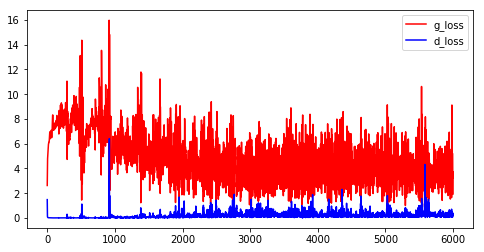

In [10]:
plt.figure(figsize=(8,4))
plt.plot(history['g_loss'], 'r-')
plt.plot(history['d_loss'], 'b-')
plt.legend(['g_loss', 'd_loss'], loc=1)
plt.show()